# Polynomial Regression Using a Pipeline

Pipelines in scikit-learn streamline the process of transforming data and fitting a model. 


When using PolynomialFeatures, a pipeline allows you to combine preprocessing (e.g., generating polynomial features) and modeling (e.g., linear regression) into a single workflow.


### Import Required Modules

In [25]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

### Sample Data

In [2]:
# Sample data
X = np.linspace(-3, 3, 200).reshape(200, 1)

In [6]:
X[0:5]

array([[-3.        ],
       [-2.96984925],
       [-2.93969849],
       [-2.90954774],
       [-2.87939698]])

In [7]:
# Define y as a cubic relationship with noise
y = 2 * X**3 - 3 * X**2 + X + np.random.normal(0, 2, X.shape)

In [13]:
y[0:5]

array([[-86.365126  ],
       [-81.60512036],
       [-81.34386275],
       [-78.66080392],
       [-73.4422347 ]])

### Split the data into training and testing sets 

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)   

### Create a pipeline

In [16]:
degree = 2
pipeline = Pipeline([
    # Step 1: Generate polynomial features
    ('poly_features', PolynomialFeatures(degree=degree, include_bias=True)),  
    # Step 2: Fit a linear regression model
    ('linear_reg', LinearRegression())                                        
])

### Train the model on the training set

In [17]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('poly_features', PolynomialFeatures()),
                ('linear_reg', LinearRegression())])

### Make predictions on the test set

In [18]:
y_pred = pipeline.predict(X_test)

### Plot

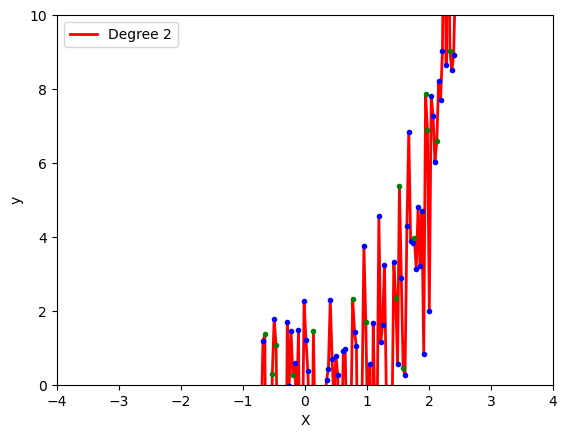

In [23]:
plt.plot(X, y,'r', label="Degree " + str(degree), linewidth=2)
plt.plot(X_train, y_train, "b.", linewidth=3)
plt.plot(X_test, y_test, "g.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("X")
plt.ylabel("y")
plt.axis([-4,4, 0, 10])
plt.show()

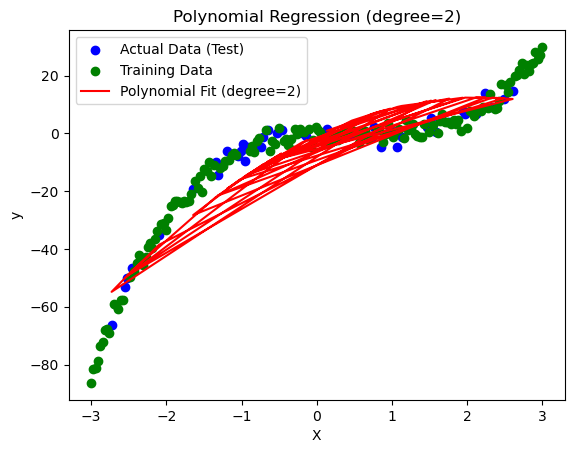

In [ ]:
plt.scatter(X_test, y_test, color='blue', label="Actual Data (Test)")
plt.scatter(X_train, y_train, color='green', alpha=0.5, label="Training Data")

plt.plot(X_test, y_pred, color='red', label=f"Polynomial Fit (degree={degree})")
plt.title(f"Polynomial Regression (degree={degree})")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()   

In [28]:
def polynomial_regression_pipeline(X, y, degree=2, test_size=0.2, random_state=None, scale=False, show_plot = True):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    # Build the pipeline steps
    steps = [('poly_features', PolynomialFeatures(degree=degree))]
    if scale:
        steps.append(('scaler', StandardScaler()))
    steps.append(('linear_reg', LinearRegression()))

    # Create the pipeline
    pipeline = Pipeline(steps)
    
    # Train the model on the training set
    pipeline.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = pipeline.predict(X_test)

    # Plot if required
    if show_plot:
        plt.scatter(X_test, y_test, color='blue', label="Actual Data (Test)")
        plt.scatter(X_train, y_train, color='green', alpha=0.5, label="Training Data")
        plt.plot(X_test, y_pred, color='red', label=f"Polynomial Fit (degree={degree})")
        plt.title(f"Polynomial Regression (degree={degree})")
        plt.xlabel("X")
        plt.ylabel("y")
        plt.legend()
        plt.show()

    return pipeline, y_test, y_pred





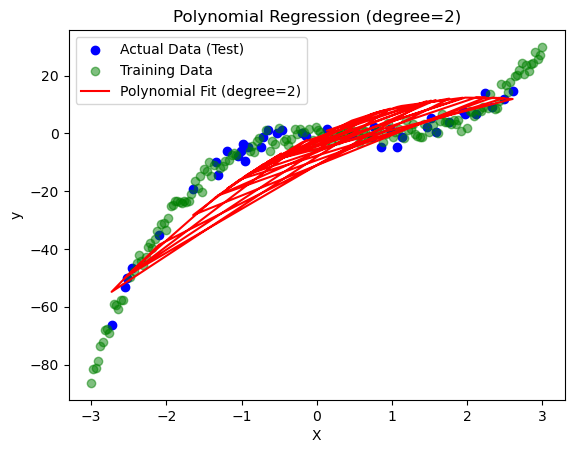

Actual Test Values: [[ -0.82051506]
 [-53.30670777]
 [-34.99073512]
 [  3.9813843 ]
 [ -4.55061698]]
Predicted Test Values: [[ -2.3447336 ]
 [-49.94111584]
 [-38.51885308]
 [ 12.05644175]
 [  7.73511015]]


In [31]:
# Perform polynomial regression
model, y_test, y_pred = polynomial_regression_pipeline(X, y, degree=2, test_size=0.2, random_state=42)
# Print predictions and actual values
print("Actual Test Values:", y_test[:5])
print("Predicted Test Values:", y_pred[:5])

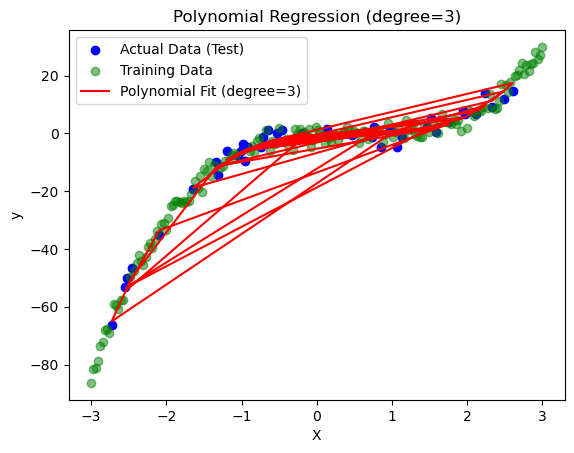

Actual Test Values: [[ -0.82051506]
 [-53.30670777]
 [-34.99073512]
 [  3.9813843 ]
 [ -4.55061698]]
Predicted Test Values: [[ -0.5068037 ]
 [-54.64181759]
 [-33.57837449]
 [  3.31269017]
 [ -0.25831791]]


In [32]:
# Perform polynomial regression
model, y_test, y_pred = polynomial_regression_pipeline(X, y, degree=3, test_size=0.2, random_state=42)
# Print predictions and actual values
print("Actual Test Values:", y_test[:5])
print("Predicted Test Values:", y_pred[:5])

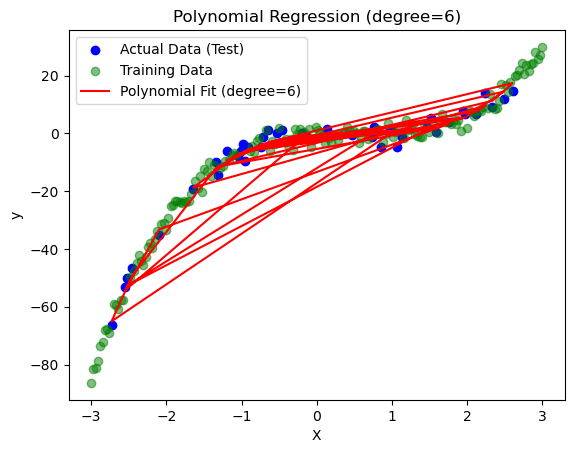

Actual Test Values: [[ -0.82051506]
 [-53.30670777]
 [-34.99073512]
 [  3.9813843 ]
 [ -4.55061698]]
Predicted Test Values: [[ -0.63192443]
 [-54.28704386]
 [-33.20237192]
 [  3.33736868]
 [ -0.09995298]]


In [33]:
# Perform polynomial regression
model, y_test, y_pred = polynomial_regression_pipeline(X, y, degree=6, test_size=0.2, random_state=42)
# Print predictions and actual values
print("Actual Test Values:", y_test[:5])
print("Predicted Test Values:", y_pred[:5])